In [1]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages') # Link to my local libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
sys.version

'3.5.1 |Continuum Analytics, Inc.| (default, Jan 29 2016, 15:01:46) [MSC v.1900 64 bit (AMD64)]'

Author: Alex Galea   
Date: September, 2016

## SymPy Tutorial

SymPy can be installed with

`pip install sympy`

To easily check if the package is already installed or has installed properly, boot up the python interpreter and try to import it.

Here is the mantra of SymPy (from the docs):

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form.

In [2]:
from sympy import *

### Datatypes, constants, built-in functions

__Constants__

In [3]:
pi, type(pi), pi.evalf()

(pi, sympy.core.numbers.Pi, 3.14159265358979)

In [4]:
pi.evalf() == np.pi

True

In [5]:
oo, oo > 99999999

(oo, True)

___
__Complex numbers__

In [6]:
complex_number = 1 + 4*I
complex_number

1 + 4*I

In [7]:
expand(complex_number**2)

-15 + 8*I

___
__Trigonometric functions__

In [8]:
cos(2*pi), cos(3.9)

(1, -0.725932304200140)

In [9]:
cos(4), cos(4).evalf()

(cos(4), -0.653643620863612)

In [10]:
sin(2.4*pi)

sin(0.4*pi)

In [11]:
x = np.linspace(0, 3*pi.evalf(), 50)

TypeError: data type not understood

In [12]:
type(3*pi.evalf())

sympy.core.numbers.Float

In [13]:
float(3*pi), type(float(3*pi))

(9.42477796076938, float)

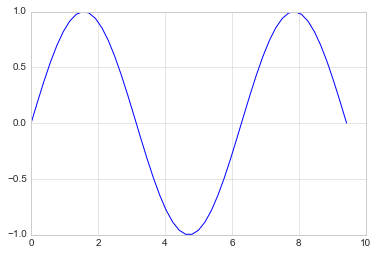

In [14]:
x = np.linspace(0, float(3*pi), 50)
plt.plot(x, [sin(x_i) for x_i in x])

___
__Other built-in functions__

In [15]:
exp(59), exp(59.1)

(exp(59), 4.64305555898613e+25)

In [16]:
type(exp(59)), type(exp(59.1))

(exp, sympy.core.numbers.Float)

In [17]:
y = exp(-2) * (2 + (1 + (exp(-3))))
y

(exp(-3) + 3)*exp(-2)

In [18]:
expand(y)

exp(-5) + 3*exp(-2)

In [19]:
factorial(4) == 4 * 3 * 2 * 1

True

In [20]:
n = 20
[binomial(n, k) for k in range(n+1)]

[1,
 20,
 190,
 1140,
 4845,
 15504,
 38760,
 77520,
 125970,
 167960,
 184756,
 167960,
 125970,
 77520,
 38760,
 15504,
 4845,
 1140,
 190,
 20,
 1]

In [21]:
np.array([binomial(n, k) for k in range(n+1)]) / sum([binomial(n, k) for k in range(n+1)])

array([1/1048576, 5/262144, 95/524288, 285/262144, 4845/1048576, 969/65536,
       4845/131072, 4845/65536, 62985/524288, 20995/131072, 46189/262144,
       20995/131072, 62985/524288, 4845/65536, 4845/131072, 969/65536,
       4845/1048576, 285/262144, 95/524288, 5/262144, 1/1048576], dtype=object)

In [22]:
np.array([binomial(n, k).evalf(3) for k in range(n+1)]) / sum([binomial(n, k) for k in range(n+1)])

array([9.54e-7, 1.91e-5, 0.000181, 0.00109, 0.00462, 0.0148, 0.0370,
       0.0739, 0.120, 0.160, 0.176, 0.160, 0.120, 0.0739, 0.0370, 0.0148,
       0.00462, 0.00109, 0.000181, 1.91e-5, 9.54e-7], dtype=object)

### Symbolic computation

__Simple calculus__

In [23]:
symbols?

In [24]:
a, g = symbols('alpha gamma')

In [25]:
f = a**2 + 500 * a / g
f

alpha**2 + 500*alpha/gamma

In [26]:
diff(f, a)

2*alpha + 500/gamma

In [27]:
diff(f, g)

-500*alpha/gamma**2

In [28]:
diff(f, g, a)

-500/gamma**2

In [29]:
integrate(f, g, a)

alpha**3*gamma/3 + 250*alpha**2*log(gamma)

In [30]:
result = integrate(f, (g, -1, 1), (a, 0, 1))
result

2/3 - 250*I*pi

In [31]:
type(result)

sympy.core.add.Add

In [32]:
complex(result), type(complex(result))

((0.6666666666666666-785.3981633974483j), complex)

___
__Difficult calculus__

In [33]:
r, b, c, d = symbols('r, b, c, d')
beta = (1 + c * b * r) * (1 - exp(-d * b * r)) * exp(-b * r) / (d * b * r)

In [34]:
beta

(1 - exp(-b*d*r))*(b*c*r + 1)*exp(-b*r)/(b*d*r)

In [35]:
pretty(beta)

'⎛     -b⋅d⋅r⎞              -b⋅r\n⎝1 - ℯ      ⎠⋅(b⋅c⋅r + 1)⋅ℯ    \n───────────────────────────────\n             b⋅d⋅r             '

In [36]:
pprint(beta)

⎛     -b⋅d⋅r⎞              -b⋅r
⎝1 - ℯ      ⎠⋅(b⋅c⋅r + 1)⋅ℯ    
───────────────────────────────
             b⋅d⋅r             


In [37]:
diff(beta, r)

c*(1 - exp(-b*d*r))*exp(-b*r)/(d*r) + (b*c*r + 1)*exp(-b*r)*exp(-b*d*r)/r - (1 - exp(-b*d*r))*(b*c*r + 1)*exp(-b*r)/(d*r) - (1 - exp(-b*d*r))*(b*c*r + 1)*exp(-b*r)/(b*d*r**2)

In [38]:
integrate(beta, r)

(b*c*Piecewise((r, b == 0), (-exp(-b*r)/b, True)) - b*c*Piecewise((r, Or(b == 0, d == -1)), (-1/(b*d*exp(b*r)*exp(b*d*r) + b*exp(b*r)*exp(b*d*r)), True)) + Ei(b*r*exp_polar(I*pi)) - Ei(b*r*exp_polar(I*pi)*polar_lift(d + 1)))/(b*d)

In [39]:
beta_f = lambdify((r, b, c, d), beta)
beta_f

<function numpy.<lambda>>

In [40]:
beta_f(4, 1, 1, 1)

0.02247522032603958

C:\Anaconda3\Lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


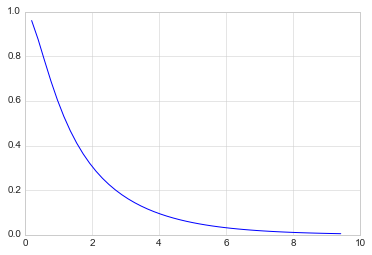

In [41]:
b_, c_, d_ = 0.5, 3.5, 5.0
r_ = np.linspace(0, 10, 50)
plt.plot(x, [beta_f(r_i, b_, c_, d_) for r_i in r_])

In [42]:
my_beta = beta.subs([(b, 0.5), (c, 3.5), (d, 5.0)])
my_beta

0.4*(1.75*r + 1)*(-exp(-2.5*r) + 1)*exp(-0.5*r)/r

In [43]:
limit(my_beta, r, oo)

0

In [44]:
limit(my_beta, r, 0)

1.00000000000000

In [45]:
%%time
result = integrate(my_beta, (r, 0, oo))
print(result.evalf())

1.16666666666667
Wall time: 1min 28s


In [46]:
%%time
my_beta_f = lambdify(r, my_beta)
r_ = np.arange(0.01, 10, 0.01)
result = np.trapz(y=[my_beta_f(r_i) for r_i in r_],
                  x=r_)
print(result)

1.86342862891
Wall time: 10.5 ms


In [47]:
%%time
result = integrate(my_beta, (r, 0.01, oo))
print(result.evalf())

1.8733708735337 + 0.e-20*I
Wall time: 1.71 s


___
__Taylor expansions__

In [48]:
x = symbols('x')
pprint(sin(x).series(x))
pprint(sin(x).series(x, 0, 11))

     3     5        
    x     x     ⎛ 6⎞
x - ── + ─── + O⎝x ⎠
    6    120        
     3     5     7       9           
    x     x     x       x       ⎛ 11⎞
x - ── + ─── - ──── + ────── + O⎝x  ⎠
    6    120   5040   362880         


In [49]:
beta.series(r)

1 + r*(b*c - b*d/2 - b) + r**2*(-b**2*c*d/2 - b**2*c + b**2*d**2/6 + b**2*d/2 + b**2/2) + r**3*(b**3*c*d**2/6 + b**3*c*d/2 + b**3*c/2 - b**3*d**3/24 - b**3*d**2/6 - b**3*d/4 - b**3/6) + r**4*(-b**4*c*d**3/24 - b**4*c*d**2/6 - b**4*c*d/4 - b**4*c/6 + b**4*d**4/120 + b**4*d**3/24 + b**4*d**2/12 + b**4*d/12 + b**4/24) + r**5*(b**5*c*d**4/120 + b**5*c*d**3/24 + b**5*c*d**2/12 + b**5*c*d/12 + b**5*c/24 - b**5*d**5/720 - b**5*d**4/120 - b**5*d**3/48 - b**5*d**2/36 - b**5*d/48 - b**5/120) + O(r**6)

In [50]:
my_beta.series(r)

1.0 - 1.27083333333333*r**2 + 1.78645833333333*r**3 - 1.55078125*r**4 + 1.01232638888889*r**5 + O(r**6)

___
__Equations and solving for unknowns__

In [51]:
x, y = symbols('x, y')
coef = np.random.random(size=4)
RHS = sum([c * x**i for i, c in enumerate(coef)])
equation = Eq(y, RHS)

In [52]:
type(RHS), type(equation)

(sympy.core.add.Add, sympy.core.relational.Equality)

In [53]:
equation

y == 0.389636681937449*x**3 + 0.801914061356568*x**2 + 0.892165535895161*x + 0.206608995304542

In [54]:
my_eqn = equation.subs([(x, 0)])
my_eqn

y == 0.206608995304542

In [55]:
my_y = solve(my_eqn, y)[0]
my_y

0.206608995304542

In [56]:
my_eqn = equation.subs([(y, 5.0)])
my_eqn

5.0 == 0.389636681937449*x**3 + 0.801914061356568*x**2 + 0.892165535895161*x + 0.206608995304542

In [57]:
my_x = solve(my_eqn, x)
my_x

[1.55531869365188,
 -1.80671294795134 - 2.15535477127814*I,
 -1.80671294795134 + 2.15535477127814*I]

In [58]:
equation.subs([(y, 5.0), (x, 0)])

False

In [59]:
# This should be returning True because the root satisfies the equation
equation.subs([(y, 5.0), (x, my_x[0])])

False

In [60]:
# See, I told you so ...
5.0 == solve(equation.subs([(x, my_x[0])]), y)[0]

True

In [61]:
# And the other roots give
print(solve(equation.subs([(x, my_x[1])]), y)[0])
print(solve(equation.subs([(x, my_x[2])]), y)[0])

5.0 - 2.46558823325057e-14*I
5.0 + 2.46558823325057e-14*I


### Pretty printing

In [62]:
init_session()

IPython console for SymPy 0.7.6.1 (Python 3.5.1-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


In [63]:
x, y = symbols('x, y')
coef = np.random.random(size=4)
RHS = sum([c * x**i for i, c in enumerate(coef)])
equation = Eq(y, RHS)
equation

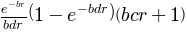

In [64]:
r, b, c, d = symbols('r, b, c, d')
beta = (1 + c * b * r) * (1 - exp(-d * b * r)) * exp(-b * r) / (d * b * r)
beta

In [65]:
beta.series(r)

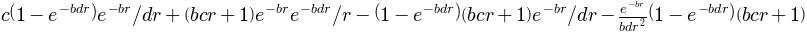

In [66]:
diff(beta, r)

In [67]:
print(latex(beta))

\frac{e^{- b r}}{b d r} \left(1 - e^{- b d r}\right) \left(b c r + 1\right)


In [68]:
print(latex(diff(beta, r, b, d)))

\left(- 2 b c r e^{- b d r} - \frac{2 b}{d} c r e^{- b d r} + b d r \left(b c r + 1\right) e^{- b d r} + 2 b r \left(b c r + 1\right) e^{- b d r} + \frac{b r}{d} \left(b c r + 1\right) e^{- b d r} - \frac{c}{d} e^{- b d r} + \frac{2 c}{d^{2}} \left(1 - e^{- b d r}\right) + \frac{1}{d} \left(b c r + 1\right) e^{- b d r} - \frac{1}{d^{2}} \left(1 - e^{- b d r}\right) \left(b c r + 1\right) + \frac{c}{b d^{2} r} \left(1 - e^{- b d r}\right) + \frac{e^{- b d r}}{b d r} \left(b c r + 1\right) - \frac{1}{b d^{2} r} \left(1 - e^{- b d r}\right) \left(b c r + 1\right) - \frac{1}{b^{2} d^{2} r^{2}} \left(1 - e^{- b d r}\right) \left(b c r + 1\right)\right) e^{- b r}


Look at all the LaTeX I wrote ;)

$\frac{\partial{d}}{\partial{d}} \frac{\partial{d}}{\partial{b}} \frac{\partial{d}}{\partial{r}} \Big[\frac{e^{- b r}}{b d r} \left(1 - e^{- b d r}\right) \left(b c r + 1\right)\Big] = \left(- 2 b c r e^{- b d r} - \frac{2 b}{d} c r e^{- b d r} + b d r \left(b c r + 1\right) e^{- b d r} + 2 b r \left(b c r + 1\right) e^{- b d r} + \frac{b r}{d} \left(b c r + 1\right) e^{- b d r} - \frac{c}{d} e^{- b d r} + \frac{2 c}{d^{2}} \left(1 - e^{- b d r}\right) + \frac{1}{d} \left(b c r + 1\right) e^{- b d r} - \frac{1}{d^{2}} \left(1 - e^{- b d r}\right) \left(b c r + 1\right) + \frac{c}{b d^{2} r} \left(1 - e^{- b d r}\right) + \frac{e^{- b d r}}{b d r} \left(b c r + 1\right) - \frac{1}{b d^{2} r} \left(1 - e^{- b d r}\right) \left(b c r + 1\right) - \frac{1}{b^{2} d^{2} r^{2}} \left(1 - e^{- b d r}\right) \left(b c r + 1\right)\right) e^{- b r}$